# 2 - 15 vs 50 Year Module: 100% RE by 2050

Comparison case using the functions in CE-MFC to compare 15 year module reliability vs 50 year module reliability.





![Folder 15 vs 50 year Module](../images_wiki/2_15vs50Overview.PNG)

This scenario is a though experiment comparing a 15-year 95% recyclable module versus a 50-year module 30% recyclable module.
This is done to understand potential tradeoffs in PV technology evolution - is it better to create
a completely recyclable PV panel, or to extend the module lifetime.
This scenario assumes that the 15-year module is 95% recyclable into high quality material, i.e. it will be used to create new modules.

95% recyclability is represented by a 100% collection rate and a 95% efficient recycling process.

The 50-year module uses the previous settings.

Plot the annual waste glass sent to the landfill for this scenario. 
Here, because the 15-module is 100% collected and only 5% is landfilled during the recycling process
the landfilled glass is very low regardless of capacity assumptions.
Thus, if the intent is to avoid landfilled material, a 95% recyclable module is the best technology evolution.


In [1]:
import os
from pathlib import Path

testfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'TEMP' / 'Cole2021')

# Another option using relative address; for some operative systems you might need '/' instead of '\'
# testfolder = os.path.abspath(r'..\..\PV_ICE\TEMP')  

print ("Your simulation will be stored in %s" % testfolder)

Your simulation will be stored in C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Cole2021


In [2]:
import PV_ICE

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 5)

In [4]:
print(os.getcwd())
moduleFile = r'..\..\baselines\baseline_modules_US_57RE2050.csv'
moduleFile_high = r'..\..\baselines\baseline_modules_US_100RE2050.csv'

MATERIALS = ['glass','aluminium_frames','silver','silicon', 'copper', 'encapsulant']
MATERIAL = MATERIALS[0]

C:\Users\hmirletz\Documents\GitHub\PV_ICE\docs\tutorials


In [ ]:
r1 = PV_ICE.Simulation(name='Simulation1', path=testfolder)

In [ ]:
#57% RE proejctions
r1.createScenario(name='50_Year_Module', file=moduleFile)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['50_Year_Module'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

r1.createScenario(name='15_Year_Module', file=moduleFile)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['15_Year_Module'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

r1.createScenario(name='base', file=moduleFile)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['base'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)
    


In [ ]:
#95% RE projections
r1.createScenario(name='50_Year_Module_high', file=moduleFile_high)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['50_Year_Module_high'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

r1.createScenario(name='15_Year_Module_high', file=moduleFile_high)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['15_Year_Module_high'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

r1.createScenario(name='base_high', file=moduleFile_high)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['base_high'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

In [ ]:
#r1.scenario['50_Year_Module'].data.keys()
r1.scenario['base_high'].material.keys()

## Change Reliability Values

Because of the way module lifetime is handled in PV ICE, we need to modify the T50 and T90 values for the Weibull distribution, the economic or project module lifetime, and the degradation rate of the module. This will most accurately and completely represent a module with a particular lifetime.

In [ ]:
########57% RE projection
r1.scenario['50_Year_Module'].data['mod_reliability_t50'] = 60
r1.scenario['50_Year_Module'].data['mod_reliability_t90'] = 70
r1.scenario['50_Year_Module'].data['mod_lifetime'] = 50
r1.scenario['15_Year_Module'].data['mod_degradation'] = 0.4

r1.scenario['15_Year_Module'].data['mod_reliability_t50'] = 20
r1.scenario['15_Year_Module'].data['mod_reliability_t90'] = 25
r1.scenario['15_Year_Module'].data['mod_lifetime'] = 15
r1.scenario['15_Year_Module'].data['mod_degradation'] = 1.4


In [ ]:
######95% RE projection
r1.scenario['50_Year_Module_high'].data['mod_reliability_t50'] = 60
r1.scenario['50_Year_Module_high'].data['mod_reliability_t90'] = 70
r1.scenario['50_Year_Module_high'].data['mod_lifetime'] = 50
r1.scenario['50_Year_Module_high'].data['mod_degradation'] = 0.4

r1.scenario['15_Year_Module_high'].data['mod_reliability_t50'] = 20
r1.scenario['15_Year_Module_high'].data['mod_reliability_t90'] = 25
r1.scenario['15_Year_Module_high'].data['mod_lifetime'] = 15
r1.scenario['15_Year_Module_high'].data['mod_degradation'] = 1.4

## Change Recyclability Values

In [ ]:
#list of material recycling variables
RecyclingPaths = ['mat_MFG_scrap_recycled', 'mat_MFG_scrap_Recycled_into_HQ', 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 'mat_EOL_collected_Recycled', 'mat_EOL_Recycled_into_HQ', 'mat_EoL_Recycled_HQ_into_MFG']
RecyclingYields = ['mat_MFG_scrap_recycling_eff', 'mat_EOL_Recycling_eff']

In [ ]:
###############57% RE projection
#15 Year Module Value setting
r1.scenario['15_Year_Module'].data['mod_EOL_collected_recycled'] = 100.0 #100% collection
r1.scenario['15_Year_Module'].data['mod_EOL_collection_eff'] = 100.0

for mat in range (0, len(MATERIALS)):
    for var in range (0,len(RecyclingPaths)):
        r1.scenario['15_Year_Module'].material[MATERIALS[mat]].materialdata[RecyclingPaths[var]] = 100.0
    for ylds in range(0,len(RecyclingYields)):
        r1.scenario['15_Year_Module'].material[MATERIALS[mat]].materialdata[RecyclingYields[ylds]] = 90.0

#50 year module value setting
r1.scenario['50_Year_Module'].data['mod_EOL_collected_recycled'] = 100.0 #100% collection
r1.scenario['50_Year_Module'].data['mod_EOL_collection_eff'] = 100.0

for mat in range (0, len(MATERIALS)):
    for var in range (0,len(RecyclingPaths)):
        r1.scenario['50_Year_Module'].material[MATERIALS[mat]].materialdata[RecyclingPaths[var]] = 100.0
    for ylds in range(0,len(RecyclingYields)):
        r1.scenario['50_Year_Module'].material[MATERIALS[mat]].materialdata[RecyclingYields[ylds]] = 30.0
        
#print(r1.scenario['50_Year_Module'].material['encapsulant'].materialdata['mat_EOL_Recycling_eff'])


In [ ]:
##############95% RE projection
#15 Year Module Value setting
r1.scenario['15_Year_Module_high'].data['mod_EOL_collected_recycled'] = 100.0 #100% collection
r1.scenario['15_Year_Module_high'].data['mod_EOL_collection_eff'] = 100.0

for mat in range (0, len(MATERIALS)):
    for var in range (0,len(RecyclingPaths)):
        r1.scenario['15_Year_Module_high'].material[MATERIALS[mat]].materialdata[RecyclingPaths[var]] = 100.0
    for ylds in range(0,len(RecyclingYields)):
        r1.scenario['15_Year_Module_high'].material[MATERIALS[mat]].materialdata[RecyclingYields[ylds]] = 90.0

#50 year module value setting
r1.scenario['50_Year_Module_high'].data['mod_EOL_collected_recycled'] = 100.0 #100% collection
r1.scenario['50_Year_Module_high'].data['mod_EOL_collection_eff'] = 100.0

for mat in range (0, len(MATERIALS)):
    for var in range (0,len(RecyclingPaths)):
        r1.scenario['50_Year_Module_high'].material[MATERIALS[mat]].materialdata[RecyclingPaths[var]] = 100.0
    for ylds in range(0,len(RecyclingYields)):
        r1.scenario['50_Year_Module_high'].material[MATERIALS[mat]].materialdata[RecyclingYields[ylds]] = 30.0

Create the range of values that recycling and lifetime can hold

## Turn IRENA lifetime values on or off & run PV ICE simulation

In [ ]:
IRENA= False
ELorRL = 'RL'
if IRENA:
    if ELorRL == 'RL':
        weibullInputParams = {'alpha': 5.3759, 'beta': 30}  # Regular-loss scenario IRENA
    if ELorRL == 'EL':
        weibullInputParams = {'alpha': 2.49, 'beta': 30}  # Regular-loss scenario IRENA
    r1.calculateMassFlow(weibullInputParams=weibullInputParams)
    title_Method = 'Irena_'+ELorRL
else:
    r1.calculateMassFlow()
    title_Method = 'PVICE'


In [ ]:
r1.scenario['base'].material['glass'].materialdata.keys()

In [ ]:
r1.scenario['base'].data.keys()

In [ ]:
r1.plotMaterialComparisonAcrossScenarios(material='glass', keyword='mat_Total_Landfilled')

In [ ]:
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Total_Landfilled')

In [ ]:
r1.plotScenariosComparison(keyword='Installed_Capacity_[W]')

## Modifying Installed Capacity requirements to match 30 Year Module

Maintaining installed capacity, i.e. the ability to generate electricity is of paramount importance. Therefore, we want to examine how many more modules need to be deployed if they only last 15 years.

This is accomplished by first creating the scenario in our simulation, and calculating the mass flow as before. Then, the difference between the installed capacity of the 30 year module and the installed capacity of the 15 year module is taken for each year. This difference generates a new annual deployment projection where additional modules are deployed to compensate and capacity of the 15 year module = capacity of the 30 year module. Then calculate mass flow is run for the scenario with the new annual deployment projection, allowing us to track the extra material needed.

In [ ]:
##########57% RE projection
r1.createScenario(name='15_Year_Module_IncreasedInstalls', file=moduleFile)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['15_Year_Module_IncreasedInstalls'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

#define lifetime properties
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_reliability_t50'] = 20
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_reliability_t90'] = 25
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_lifetime'] = 15
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_degradation'] = 1.4

#define closed loop high recycling
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_EOL_collected_recycled'] = 100 #100% collection
r1.scenario['15_Year_Module_IncreasedInstalls'].data['mod_EOL_collection_eff'] = 100
#modify all materials
for mat in range (0, len(MATERIALS)):
    for var in range (0,len(RecyclingPaths)):
        r1.scenario['15_Year_Module_IncreasedInstalls'].material[MATERIALS[mat]].materialdata[RecyclingPaths[var]] = 100.0
    for ylds in range(0,len(RecyclingYields)):
        r1.scenario['15_Year_Module_IncreasedInstalls'].material[MATERIALS[mat]].materialdata[RecyclingYields[ylds]] = 90.0



In [ ]:
################95% RE projection
r1.createScenario(name='15_Year_Module_high_IncreasedInstalls', file=moduleFile_high)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['15_Year_Module_high_IncreasedInstalls'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

#define lifetime properties
r1.scenario['15_Year_Module_high_IncreasedInstalls'].data['mod_reliability_t50'] = 20
r1.scenario['15_Year_Module_high_IncreasedInstalls'].data['mod_reliability_t90'] = 25
r1.scenario['15_Year_Module_high_IncreasedInstalls'].data['mod_lifetime'] = 15
r1.scenario['15_Year_Module_high_IncreasedInstalls'].data['mod_degradation'] = 1.4

#define closed loop high recycling
r1.scenario['15_Year_Module_high_IncreasedInstalls'].data['mod_EOL_collected_recycled'] = 100 #100% collection
r1.scenario['15_Year_Module_high_IncreasedInstalls'].data['mod_EOL_collection_eff'] = 100
#modify all materials
for mat in range (0, len(MATERIALS)):
    for var in range (0,len(RecyclingPaths)):
        r1.scenario['15_Year_Module_high_IncreasedInstalls'].material[MATERIALS[mat]].materialdata[RecyclingPaths[var]] = 100.0
    for ylds in range(0,len(RecyclingYields)):
        r1.scenario['15_Year_Module_high_IncreasedInstalls'].material[MATERIALS[mat]].materialdata[RecyclingYields[ylds]] = 90.0

In [ ]:
r1.calculateMassFlow()

### Modifing the installed capacity requiremetns according to t50. 

Needs to run each year becuase it needs to calculate the acumulated installs and deads.


In [ ]:
#compensate for short lifetime by adding more installs, currently set to meet 30 year installs
######57% RE projection
Under_Installment = []
for i in range (0, len(r1.scenario['base'].data)):
    Under_Installment = ( (r1.scenario['base'].data['Installed_Capacity_[W]'][i] - 
                         r1.scenario['15_Year_Module_IncreasedInstalls'].data['Installed_Capacity_[W]'][i])/1000000 )  # MWATTS
    r1.scenario['15_Year_Module_IncreasedInstalls'].data['new_Installed_Capacity_[MW]'][i] += Under_Installment
    r1.calculateMassFlow()


In [ ]:
#############95% RE projection
#compensate for short lifetime by adding more installs, currently set to meet 30 year installs
Under_Installment = []
for i in range (0, len(r1.scenario['base_high'].data)):
    Under_Installment = ( (r1.scenario['base_high'].data['Installed_Capacity_[W]'][i] - 
                         r1.scenario['15_Year_Module_high_IncreasedInstalls'].data['Installed_Capacity_[W]'][i])/1000000 )  # MWATTS
    r1.scenario['15_Year_Module_high_IncreasedInstalls'].data['new_Installed_Capacity_[MW]'][i] += Under_Installment
    r1.calculateMassFlow()

### And create a 50 year decreased installs by the same principle

In [ ]:
###############57% RE projection
#create the scenario
r1.createScenario(name='50_Year_Module_DecreasedInstalls', file=moduleFile)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['50_Year_Module_DecreasedInstalls'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

#define lifetime properties
r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_reliability_t50'] = 20
r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_reliability_t90'] = 25
r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_lifetime'] = 15
r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_degradation'] = 1.4

#define closed loop high recycling
r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_EOL_collected_recycled'] = 100 #100% collection
r1.scenario['50_Year_Module_DecreasedInstalls'].data['mod_EOL_collection_eff'] = 100
#modify all materials
for mat in range (0, len(MATERIALS)):
    for var in range (0,len(RecyclingPaths)):
        r1.scenario['50_Year_Module_DecreasedInstalls'].material[MATERIALS[mat]].materialdata[RecyclingPaths[var]] = 100.0
    for ylds in range(0,len(RecyclingYields)):
        r1.scenario['50_Year_Module_DecreasedInstalls'].material[MATERIALS[mat]].materialdata[RecyclingYields[ylds]] = 90.0



In [ ]:
################95% RE projection
r1.createScenario(name='50_Year_Module_high_DecreasedInstalls', file=moduleFile_high)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r1.scenario['50_Year_Module_high_DecreasedInstalls'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

#define lifetime properties
r1.scenario['50_Year_Module_high_DecreasedInstalls'].data['mod_reliability_t50'] = 60
r1.scenario['50_Year_Module_high_DecreasedInstalls'].data['mod_reliability_t90'] = 70
r1.scenario['50_Year_Module_high_DecreasedInstalls'].data['mod_lifetime'] = 50
r1.scenario['50_Year_Module_high_DecreasedInstalls'].data['mod_degradation'] = 0.4

#define closed loop high recycling
r1.scenario['50_Year_Module_high_DecreasedInstalls'].data['mod_EOL_collected_recycled'] = 100 #100% collection
r1.scenario['50_Year_Module_high_DecreasedInstalls'].data['mod_EOL_collection_eff'] = 100
#modify all materials
for mat in range (0, len(MATERIALS)):
    for var in range (0,len(RecyclingPaths)):
        r1.scenario['50_Year_Module_high_DecreasedInstalls'].material[MATERIALS[mat]].materialdata[RecyclingPaths[var]] = 100.0
    for ylds in range(0,len(RecyclingYields)):
        r1.scenario['50_Year_Module_high_DecreasedInstalls'].material[MATERIALS[mat]].materialdata[RecyclingYields[ylds]] = 30.0

In [ ]:
r1.calculateMassFlow()

In [ ]:
######################57% RE projection
Over_Installment = []
for i in range (0, len(r1.scenario['base'].data)):
    Over_Installment = ( (r1.scenario['50_Year_Module_DecreasedInstalls'].data['Installed_Capacity_[W]'][i] - 
                         r1.scenario['base'].data['Installed_Capacity_[W]'][i])/1000000 )  # MWATTS
    r1.scenario['50_Year_Module_DecreasedInstalls'].data['new_Installed_Capacity_[MW]'][i] -= Over_Installment
    r1.calculateMassFlow()


In [ ]:
######################95% RE projection
Over_Installment = []
for i in range (0, len(r1.scenario['base_high'].data)):
    Over_Installment = ( (r1.scenario['50_Year_Module_high_DecreasedInstalls'].data['Installed_Capacity_[W]'][i] - 
                         r1.scenario['base'].data['Installed_Capacity_[W]'][i])/1000000 )  # MWATTS
    r1.scenario['50_Year_Module_high_DecreasedInstalls'].data['new_Installed_Capacity_[MW]'][i] -= Over_Installment
    r1.calculateMassFlow()

# Plots

In [ ]:
r1.plotScenariosComparison(keyword='new_Installed_Capacity_[MW]')


In [ ]:
r1.plotScenariosComparison(keyword='Installed_Capacity_[W]')

In [ ]:
r1.plotMaterialComparisonAcrossScenarios(material='silicon', keyword='mat_Virgin_Stock')


In [ ]:
r1.plotMaterialComparisonAcrossScenarios(material='encapsulant', keyword='mat_Total_Landfilled')


## Same plots but not automatic from the software to control more the parameters

In [ ]:
plt.plot(r1.scenario['base'].data['year'], r1.scenario['base'].data['Installed_Capacity_[W]']/1e12, 'g', label='base')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module'].data['Installed_Capacity_[W]']/1e12, 'r', label='50 year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module'].data['Installed_Capacity_[W]']/1e12, 'b', label='15 year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module_DecreasedInstalls'].data['Installed_Capacity_[W]']/1e12, 'r--', label='50 year Module w base capacity')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module_IncreasedInstalls'].data['Installed_Capacity_[W]']/1e12, 'b--', label='15 year Module w. base capacity')

plt.ylabel('Power [TW]')

plt.title('Installed Active Capacity')
plt.xlim([2000, 2050])
plt.legend()

In [ ]:
plt.plot(r1.scenario['base'].data['year'], r1.scenario['base'].data['new_Installed_Capacity_[MW]']/1e3, 'g', label='base')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module'].data['new_Installed_Capacity_[MW]']/1e3, 'r', label='50 year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module'].data['new_Installed_Capacity_[MW]']/1e3, 'b', label='15 year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module_DecreasedInstalls'].data['new_Installed_Capacity_[MW]']/1e3, 'r--', label='50 year Module w base capacity')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module_IncreasedInstalls'].data['new_Installed_Capacity_[MW]']/1e3, 'b--', label='15 year Module w. base capacity')

plt.ylabel('Power [GW]')

plt.title('New Installed Capacity')
plt.xlim([2000, 2050])
plt.legend()

In [ ]:
plt.plot(r1.scenario['base'].data['year'], r1.scenario['base'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'g', label='base')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'r', label='50 Year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'b', label='15 Year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'r--', label='50 Year Module w. base capacity')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_Virgin_Stock']/1e9, 'b--', label='15 Year Module w. base capacity')

plt.ylabel('Virgin Glass [Million Tonnes]')
plt.legend()
plt.title('Annual Virgin Material Input')
plt.xlim([2000, 2050])



In [ ]:
plt.plot(r1.scenario['base'].data['year'], r1.scenario['base'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'g', label='base')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'r', label='50 Year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'b', label='15 Year Module')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['50_Year_Module_DecreasedInstalls'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'r--', label='50 Year Module w. base capacity')
plt.plot(r1.scenario['base'].data['year'], r1.scenario['15_Year_Module_IncreasedInstalls'].material['glass'].materialdata['mat_Total_Landfilled']/1e9, 'b--', label='15 Year Module w. base capacity')

plt.ylabel('Landfilled Glass\n [Million Tonnes]')
plt.legend()
plt.title('Annual Landfilled Glass')
plt.xlim([2000, 2050])


# Calculating Overall changes between the Scenarios

In [ ]:
cum_Waste = []
cum_VirginNeeds = []
cum_InstalledCapacity = []
cum_NewInstalls = []

for ii in range (0, len(r1.scenario.keys())):
    # Cumulative
    scen = list(r1.scenario.keys())[ii]
    cum_Waste.append(r1.scenario[scen].material['glass'].materialdata['mat_Total_Landfilled'].sum())
    cum_VirginNeeds.append(r1.scenario[scen].material['glass'].materialdata['mat_Virgin_Stock'].sum())
    cum_NewInstalls.append(r1.scenario[scen].data['new_Installed_Capacity_[MW]'].sum())
    cum_InstalledCapacity.append(r1.scenario[scen].data['Installed_Capacity_[W]'].iloc[-1])

df = pd.DataFrame(list(zip(list(r1.scenario.keys()), cum_Waste, cum_VirginNeeds, cum_NewInstalls, cum_InstalledCapacity)),
               columns =['scenarios','cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity'])
df = df.set_index('scenarios')
#df.index
df_high = df.filter(regex='_high', axis=0)
#df_high
#df_ref = df.drop(df.index ='$_high') #####FIX LATER
#df_ref

###  Normalize by Base Scenario

In [ ]:
df[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']] = df[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']]*100/df[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']].iloc[2] -100
df.round(2)

Separate out the 95% RE projection from the 57% to normalize by the correct projection

In [ ]:
df_high[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']] = df_high[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']]*100/df_high[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']].iloc[2] -100
df_high.round(2)

### Cumulative results by material

In [ ]:
USyearly=pd.DataFrame()

keyword = 'mat_Total_Landfilled'

# Loop over Scenarios
for jj in range (0, len(r1.scenario.keys())):
    case = list(r1.scenario.keys())[jj]
        
    for ii in range (0, len(MATERIALS)):    
        material = MATERIALS[ii]
        foo = r1.scenario[case].material[material].materialdata[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["Waste_Total_"+material+'_'+r1.name+'_'+case] = foo[material]

    filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(r1.name+'_'+case)) ]
    USyearly['Waste_Total_Module_'+r1.name+'_'+case] = USyearly[filter_col].sum(axis=1)

# Converting to grams to Tons. 
USyearly.head(20)

In [ ]:
scen = list(r1.scenario.keys())
print(keyword)

In [ ]:
keyword = 'mat_Total_EOL_Landfilled'

# Loop over Scenarios
for jj in range (0, len(r1.scenario.keys())):
    case = list(r1.scenario.keys())[jj]
        
    for ii in range (0, len(MATERIALS)):    
        material = MATERIALS[ii]
        foo = r1.scenario[case].material[material].materialdata[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["Waste_EoL_"+material+'_'+r1.name+'_'+case] = foo[material]

    filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(r1.name+'_'+case)) ]
    USyearly['Waste_EoL_Module_'+r1.name+'_'+case] = USyearly[filter_col].sum(axis=1)

# Converting to grams to Tons. 
USyearly.head(20)

In [ ]:
keyword='mat_Virgin_Stock'
# Loop over Scenarios
for jj in range (0, len(r1.scenario.keys())):
    case = list(r1.scenario.keys())[jj]
        
    for ii in range (0, len(MATERIALS)):    
        material = MATERIALS[ii]
        foo = r1.scenario[case].material[material].materialdata[keyword].copy()
        foo = foo.to_frame(name=material)
        USyearly["VirginStock_"+material+'_'+case] = foo[material]

    filter_col = [col for col in USyearly if (col.startswith('Waste') and col.endswith(r1.name+'_'+case)) ]
    USyearly['VirginStock_Module_'+case] = USyearly[filter_col].sum(axis=1)

# Converting to grams to Tons. 
USyearly.head(20)

In [ ]:
USyearly = USyearly/1000000  # This is the ratio for Metric tonnes
#907185 -- this is for US tons

In [ ]:
UScum = USyearly.copy()
UScum = UScum.cumsum()
UScum.head()

In [ ]:
keyword='Installed_Capacity_[W]'
# Loop over Scenarios
for jj in range(0, len(r1.scenario.keys())):
    case = list(r1.scenario.keys())[jj]
        
    foo = r1.scenario[case].data[keyword]
    foo = foo.to_frame(name=keyword)
    UScum["Capacity_"+'_'+case] = foo[keyword]

In [ ]:
keyword='new_Installed_Capacity_[MW]'
# Loop over Scenarios
for jj in range(0, len(r1.scenario.keys())):
    case = list(r1.scenario.keys())[jj]
        
    foo = r1.scenario[case].data[keyword]
    foo = foo.to_frame(name=keyword)
    UScum["new_Installed_Capacity_"+'_'+case] = foo[keyword]

In [ ]:
USyearly.index = r1.scenario['base'].data['year']
UScum.index = r1.scenario['base'].data['year']

In [ ]:
UScum.to_csv('Cole2021_Cumulative_Results.csv')
USyearly.to_csv('Cole2021_Yearly_Results.csv')

In [ ]:
UScum.head(10)

## Output Data for Charting

In [ ]:
#selecting down for fancy plotting
# want 2050 lifecycle wastes
filter_col = [col for col in UScum if (col.startswith('Waste_Total_Module')) ]
UScum[filter_col].loc[[2050]].to_csv(os.path.join(testfolder,'Cum_Waste_2050only.csv'))

In [ ]:
#selecting down for fancy plotting
# want cumulative 2050 virgin material demands
filter_col = [col for col in UScum if (col.startswith('VirginStock_')) ]
#CumVirginMatl = UScum[filter_col].loc[[2050]]
#CumVirginMatl.columns
UScum[filter_col].loc[[2050]].to_csv(os.path.join(testfolder,'Cum2050-VirginStock-15v50.csv'))

In [ ]:
#bring a modified version of that file back in to bar plot
cwd = os.getcwd() #grabs current working directory
CumVirg_plot_input = pd.read_csv(cwd+"/input-multiIndex-CumVirginDemand.csv", index_col=[0,1,2])
CumVirg_plot_input.head(10)

In [ ]:
CumVirg_plot_input.index

In [ ]:
#remove module mass from the dataframe
CumVirg_plot = CumVirg_plot_input.drop('Module', level='Material')

#unstack the multiIndex to get the bar stacking we want
CumVirg_base_deploy= CumVirg_plot.unstack(level='Material')

#bar plot
CumVirg_base_deploy.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1,0), loc="lower left")

# Full Variation of Lifetime and Recycling

To explore the full range of lifetime vs recycling, we decided to make a 2d plot varying lifetime on one axis, and recycling on the other. This section uses only the 95% RE scenario, and maintains capacity of the 30 year deployed module projeciton (i.e. compensates for shorter and longer lived modules). Everything will be normalized to the 30 year module at the end of the calculations.

In [5]:
Life_Good = pd.Series(range(0,22,2)) #this is relative to 30 year module
Life_Bad = pd.Series(range(0,15,2))*-1 #this is relative to 30 year module
Lifetime_Range = pd.concat([pd.Series(range(15,30,3)),pd.Series(range(30,51,2))]) #this absolute lifetime values
Lifetime_Range.reset_index(inplace=True, drop=True)
Lifetime_Diff30 = Lifetime_Range-30
Degradation_Range = pd.Series([1.470, 1.220, 1.050, 0.920, 0.820, 0.740, 0.690, 0.650, 0.615, 0.582, 0.555, 0.525, 0.505, 0.480, 0.460, 0.445])
Recycling_Range = pd.Series(range(0,100,5)) # this is absolute recycling values
print(Lifetime_Range)
#print(Degradation_Range)

0     15
1     18
2     21
3     24
4     27
5     30
6     32
7     34
8     36
9     38
10    40
11    42
12    44
13    46
14    48
15    50
dtype: int64


### Create PV ICE defaults scenario with 95% RE

In [6]:
r2 = PV_ICE.Simulation(name='VaryLifetimeRecycle', path=testfolder)
#95% RE projections
#PV ICE default values for module and materials
r2.createScenario(name='base_high', file=moduleFile_high)
for mat in range (0, len(MATERIALS)):
    MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
    r2.scenario['base_high'].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)

path = C:\Users\hmirletz\Documents\GitHub\PV_ICE\PV_ICE\TEMP\Cole2021


In [7]:
#list of material recycling variables
RecyclingPaths = ['mat_MFG_scrap_recycled', 'mat_MFG_scrap_Recycled_into_HQ', 'mat_MFG_scrap_Recycled_into_HQ_Reused4MFG', 'mat_EOL_collected_Recycled', 'mat_EOL_Recycled_into_HQ', 'mat_EoL_Recycled_HQ_into_MFG']
RecyclingYields = ['mat_MFG_scrap_recycling_eff', 'mat_EOL_Recycling_eff']

### Create t50 and t90 values to match the range of module lifetimes

In PV ICE we assume that 90% of the modules should be reliabile enough to meet the economic project lifetime. Therefore, the t50 and t90 values need to be modified for each lifetime in the range.

In [8]:
#create linear regression for mod_reliability_t50 & mod_reliability_t90 vs. mod_lifetime 
#to estimate t50 and t90 values to input for improved lifetime scenario
reliability_baselines = pd.DataFrame()
reliability_baselines['mod_lifetime'] = r2.scenario['base_high'].data['mod_lifetime']
reliability_baselines['mod_reliability_t50'] = r2.scenario['base_high'].data['mod_reliability_t50']
reliability_baselines['mod_reliability_t90'] = r2.scenario['base_high'].data['mod_reliability_t90']

In [9]:
X_lifetime = reliability_baselines.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y1_t50 = reliability_baselines.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
Y2_t90 = reliability_baselines.iloc[:, 2].values.reshape(-1, 1)
range_lifetimes = np.array(Lifetime_Range).reshape(-1,1)

from sklearn.linear_model import LinearRegression
from itertools import chain

linear_regressor_Y1 = LinearRegression()
linear_regressor_Y1.fit(X_lifetime, Y1_t50)  # perform linear regression
t50_list = linear_regressor_Y1.predict(range_lifetimes).tolist()  # make predictions based on improved lifetime values
t50_list = list(chain(*t50_list)) #unnest list
t50_range_simple = pd.Series([ '%.2f' % elem for elem in t50_list ])

linear_regressor_Y2 = LinearRegression() 
linear_regressor_Y2.fit(X_lifetime, Y2_t90)
t90_list = linear_regressor_Y2.predict(range_lifetimes).tolist()
t90_list = list(chain(*t90_list)) #unnest list
t90_range_simple = pd.Series([ '%.2f' % elem for elem in t90_list ])

In [10]:
#create a tidy dataframe summarizing all the lifetime, degradation, reliability values
lifetime_range_df = pd.concat([Lifetime_Range, Degradation_Range, t50_range_simple, t90_range_simple], axis=1)
lifetime_range_df.columns = 'mod_lifetime', 'mod_degradation', 't50', 't90'
print(lifetime_range_df)

    mod_lifetime  mod_degradation    t50    t90
0             15            1.470  16.36  21.02
1             18            1.220  19.55  24.16
2             21            1.050  22.74  27.30
3             24            0.920  25.93  30.44
4             27            0.820  29.12  33.58
5             30            0.740  32.31  36.72
6             32            0.690  34.43  38.81
7             34            0.650  36.56  40.90
8             36            0.615  38.69  43.00
9             38            0.582  40.82  45.09
10            40            0.555  42.94  47.18
11            42            0.525  45.07  49.27
12            44            0.505  47.20  51.37
13            46            0.480  49.32  53.46
14            48            0.460  51.45  55.55
15            50            0.445  53.58  57.65


### Create the lifetime and recycling combinatorics simulations

In [11]:
#95% RE projections
#All combinations of recycling and lifetime
for life in range(0,len(Lifetime_Range)):
    for recycle in range (0,len(Recycling_Range)):
        scenname = str(Lifetime_Range[life])+'years & '+ str(Recycling_Range[recycle])+'% Recycled'
        r2.createScenario(name=scenname,file=moduleFile_high)
        #MODIFY LIFETIME PARAMETERS HERE
        r2.scenario[scenname].data['mod_lifetime'] = Lifetime_Range[life]
        r2.scenario[scenname].data['mod_reliability_t50'] = float(t50_range_simple[life])
        r2.scenario[scenname].data['mod_reliability_t90'] = float(t90_range_simple[life])
        r2.scenario[scenname].data['mod_degradation'] = Degradation_Range[life]
        #MODIFY Module RECYCLING PARAMATERS HERE
        #the assumption is everything is collected and sent to recycling, only recycling yields vary
        r2.scenario[scenname].data['mod_EOL_collected_recycled'] = 100.0
        r2.scenario[scenname].data['mod_EOL_collection_eff'] =100.0
        #Add Materials to scenario
        for mat in range (0,len(MATERIALS)):
            MATERIALBASELINE = r'..\..\baselines\baseline_material_'+MATERIALS[mat]+'.csv'
            r2.scenario[scenname].addMaterial(MATERIALS[mat], file=MATERIALBASELINE)
            #Modify Material recycling parameters
            for var in range(0,len(RecyclingPaths)):
                r2.scenario[scenname].material[MATERIALS[mat]].materialdata[RecyclingPaths[var]] = 100.0
            for ylds in range(0,len(RecyclingYields)):
                r2.scenario[scenname].material[MATERIALS[mat]].materialdata[RecyclingYields[ylds]] = Recycling_Range[recycle]

In [ ]:
##NOTE CURRENT DOWNSIDE TO ABOVE IS USES SAME VALUES FOR 1995 - 2050, no correct historical!!!
#All materials are set to XX% recycling yields with 100% collection

In [ ]:
print(len(r2.scenario.keys()))
#print(r2.scenario['42years & 50% Recycled'].data['mod_reliability_t50'])
#print(r2.scenario['50years & 50% Recycled'].material['silicon'].materialdata['mat_EOL_Recycling_eff'])

In [12]:
r2.calculateMassFlow()

Working on Scenario:  base_high
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15years & 0% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15years & 5% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  15year

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  18years & 25% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  18years & 30% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  18years & 35% Recycled
********************
Finished Area

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  21years & 50% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  21years & 55% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  21years & 60% Recycled
********************
Finished Area

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  24years & 75% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  24years & 80% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  24years & 85% Recycled
********************
Finished Area

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  30years & 0% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  30years & 5% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  30years & 10% Recycled
********************
Finished Area+P

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  32years & 25% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  32years & 30% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  32years & 35% Recycled
********************
Finished Area

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  34years & 50% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  34years & 55% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  34years & 60% Recycled
********************
Finished Area

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  36years & 75% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  36years & 80% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  36years & 85% Recycled
********************
Finished Area

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  40years & 0% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  40years & 5% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  40years & 10% Recycled
********************
Finished Area+P

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  42years & 25% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  42years & 30% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  42years & 35% Recycled
********************
Finished Area

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  44years & 50% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  44years & 55% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  44years & 60% Recycled
********************
Finished Area

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  46years & 75% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  46years & 80% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  46years & 85% Recycled
********************
Finished Area

Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50years & 0% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50years & 5% Recycled
********************
Finished Area+Power Generation Calculations
==> Working on Material :  glass
==> Working on Material :  aluminium_frames
==> Working on Material :  silver
==> Working on Material :  silicon
==> Working on Material :  copper
==> Working on Material :  encapsulant
Working on Scenario:  50years & 10% Recycled
********************
Finished Area+P

In [ ]:
r2.plotScenariosComparison(keyword='Installed_Capacity_[W]')

### Cumulative Comparison
Calculate the comparison of cumulative differences in material demands, wastes, and installed capacity as a relative to the PV ICE default values.

In [13]:
RvL_cum_Waste = []
RvL_cum_VirginNeeds = []
RvL_cum_InstalledCapacity = []
RvL_cum_NewInstalls = []

for ii in range (0, len(r2.scenario.keys())):
    # Cumulative
    scen = list(r2.scenario.keys())[ii]
    RvL_cum_Waste.append(r2.scenario[scen].material['glass'].materialdata['mat_Total_Landfilled'].sum())
    RvL_cum_VirginNeeds.append(r2.scenario[scen].material['glass'].materialdata['mat_Virgin_Stock'].sum())
    RvL_cum_NewInstalls.append(r2.scenario[scen].data['new_Installed_Capacity_[MW]'].sum())
    RvL_cum_InstalledCapacity.append(r2.scenario[scen].data['Installed_Capacity_[W]'].iloc[-1])

df = pd.DataFrame(list(zip(list(r2.scenario.keys()), RvL_cum_Waste, RvL_cum_VirginNeeds, RvL_cum_NewInstalls, RvL_cum_InstalledCapacity)),
               columns =['scenarios','cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity'])
df = df.set_index('scenarios')
#Normalize by PV ICE default
df[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']] = df[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']]*100/df[['cum_Waste', 'cum_VirginNeeds', 'cum_NewInstalls', 'cum_InstalledCapacity']].iloc[0] -100
df.round(2)
print(df)

                         cum_Waste  cum_VirginNeeds  cum_NewInstalls  \
scenarios                                                              
base_high                 0.000000         0.000000    -1.421085e-14   
15years & 0% Recycled   495.202124        -1.336444    -1.421085e-14   
15years & 5% Recycled   466.376136        -1.589389    -1.421085e-14   
15years & 10% Recycled  437.550148        -1.842334    -1.421085e-14   
15years & 15% Recycled  408.724159        -2.095279    -1.421085e-14   
...                            ...              ...              ...   
50years & 75% Recycled  -81.262566        -1.337894    -1.421085e-14   
50years & 80% Recycled  -81.273582        -1.337991    -1.421085e-14   
50years & 85% Recycled  -81.284597        -1.338088    -1.421085e-14   
50years & 90% Recycled  -81.295612        -1.338184    -1.421085e-14   
50years & 95% Recycled  -81.306627        -1.338281    -1.421085e-14   

                        cum_InstalledCapacity  
scenarios      

In [17]:
#print out to a csv for plotting
df.to_csv(os.path.join(testfolder,'Cum2050-RvL-HeatMapData.csv'))

In [68]:
cwd = os.getcwd() #grabs current working directory
RvL_cums = pd.read_csv(cwd+"/input-RvL-CumResults-Multiindex.csv", index_col=[1,2])
RvL_cums = RvL_cums[RvL_cums.scenarios != 'base_high']
RvL_cums.head(5)

scenarios   cum_Waste  cum_VirginNeeds  \
Lifetime Recycling                                                        
15       0           15years & 0% Recycled  495.202124        -1.336444   
         5           15years & 5% Recycled  466.376136        -1.589389   
         10         15years & 10% Recycled  437.550148        -1.842334   
         15         15years & 15% Recycled  408.724159        -2.095279   
         20         15years & 20% Recycled  379.898171        -2.348224   

                    cum_NewInstalls  cum_InstalledCapacity  
Lifetime Recycling                                          
15       0            -1.421090e-14             -62.156965  
         5            -1.421090e-14             -62.156965  
         10           -1.421090e-14             -62.156965  
         15           -1.421090e-14             -62.156965  
         20           -1.421090e-14             -62.156965

In [103]:
heatdata_Waste = RvL_cums[['cum_Waste']]
heatdata_Waste_pivot = heatdata_Waste.unstack()
heatdata_Waste_pivot.columns = Recycling_Range

heatdata_Virgin = RvL_cums[['cum_VirginNeeds']]
heatdata_Virgin_pivot = heatdata_Virgin.unstack()
heatdata_Virgin_pivot.columns = Recycling_Range

heatdata_InstalledCap = RvL_cums[['cum_InstalledCapacity']]
heatdata_InstalledCap_pivot = heatdata_InstalledCap.unstack()
heatdata_InstalledCap_pivot.columns = Recycling_Range


Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
            85, 90, 95],
           dtype='int64')

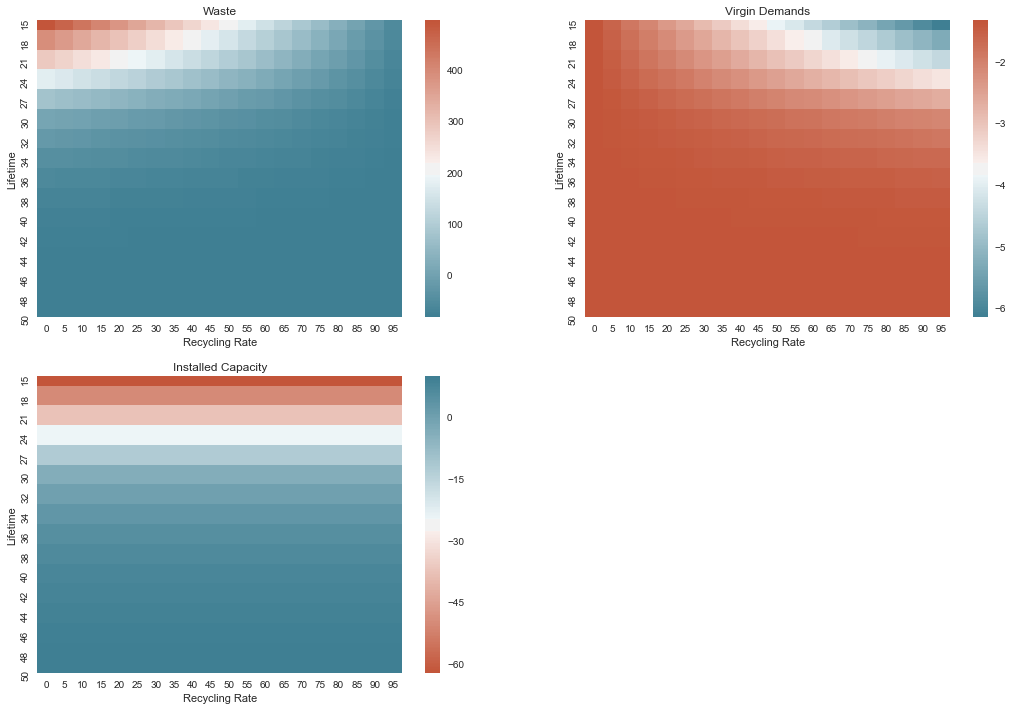

In [105]:
#Make 3 heat maps with cumulative data
import seaborn as sns
plt.style.use("seaborn")

plt.rcParams.update({'font.size': 40})
plt.rcParams['figure.figsize'] = (18, 12)

#Wastes
plt.subplot(2,2,1)
sns.heatmap(heatdata_Waste_pivot, annot = False, 
            cmap=sns.diverging_palette(220, 20, n=200), vmin=np.min(heatdata_Waste_pivot).min(), vmax=np.max(heatdata_Waste_pivot).max())
plt.title('Waste')
plt.xlabel('Recycling Rate')

#Virgin Demands
plt.subplot(2,2,2)
sns.heatmap(heatdata_Virgin_pivot, annot = False,
           cmap=sns.diverging_palette(220, 20, n=200), vmin=np.min(heatdata_Virgin_pivot).min(), vmax=np.max(heatdata_Virgin_pivot).max())
plt.title('Virgin Demands')
plt.xlabel('Recycling Rate')

#Installed Capacity
plt.subplot(2,2,3)
sns.heatmap(heatdata_InstalledCap_pivot, annot = False,
           cmap=sns.diverging_palette(20, 220, n=200), vmin=np.min(heatdata_InstalledCap_pivot).min(), vmax=np.max(heatdata_InstalledCap_pivot).max())
plt.title('Installed Capacity')
plt.xlabel('Recycling Rate')


#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
#plt.colorbar(label='G$_{rear}$')
#fig.axes.get_yaxis().set_visible(False)
#fig.axes.get_xaxis().set_visible(False)
plt.show()

Text(0.5, 1.0, 'Installed Capacity')

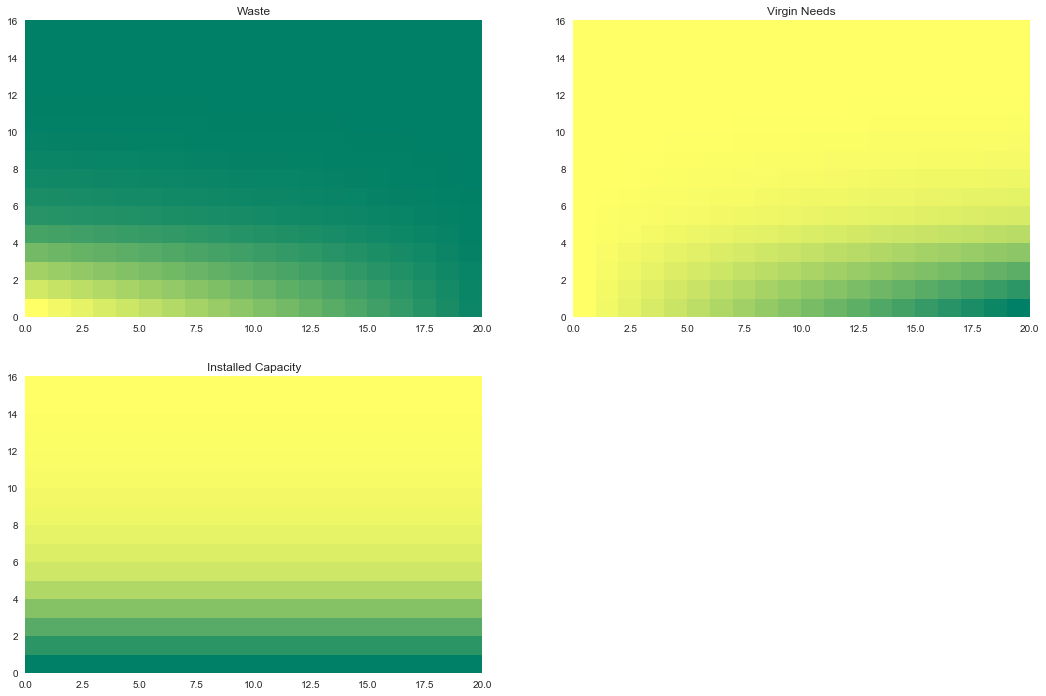

In [87]:
plt.rcParams.update({'font.size': 2})
plt.rcParams['figure.figsize'] = (18, 12)

#Wastes
plt.subplot(2,2,1)
plt.pcolormesh(heatdata_Waste_pivot, cmap='summer')
plt.title('Waste')

#Virgin Needs
plt.subplot(2,2,2)
plt.pcolormesh(heatdata_Virgin_pivot, cmap='summer')
plt.title('Virgin Needs')

#Installed Cap
plt.subplot(2,2,3)
plt.pcolormesh(heatdata_InstalledCap_pivot, cmap='summer')
plt.title('Installed Capacity')

### Installation compensation

creating a duplicate of r2 simulation so as not to overwrite data while creating the installation compensation set of scenarios.

In [ ]:
r3 = r2
#r3.scenario['50years & 50% Recycled'].data['mod_lifetime']
r3.plotScenariosComparison(keyword='Installed_Capacity_[W]')

In [ ]:
#############95% RE projection
#compensate for short lifetime by adding more installs, currently set to meet 30 year installs
Under_Installment = []
for ii in range (0, len(r3.scenario.keys())):
    # Cumulative
    scen = list(r3.scenario.keys())[ii]
    for i in range (0, len(r3.scenario['base_high'].data)):
        Under_Installment = ( (r3.scenario['base_high'].data['Installed_Capacity_[W]'][i] - r3.scenario[scen].data['Installed_Capacity_[W]'][i])/1000000 )  # MWATTS
        r3.scenario[scen].data['new_Installed_Capacity_[MW]'][i] += Under_Installment
        r3.calculateMassFlow()

In [ ]:
print(len(r3.scenario['base_high'].data))

print(len(r3.scenario.keys()))


In [ ]:
print(r3.scenario['32years & 35% Recycled'].data['Installed_Capacity_[W]'])